In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from stereo_matching import *
# data from: https://github.com/2b-t/stereo-matching/tree/main
# implementation adapted from: https://stackoverflow.com/questions/36172913/opencv-depth-map-from-uncalibrated-stereo-system 

(np.float64(-0.5), np.float64(449.5), np.float64(374.5), np.float64(-0.5))

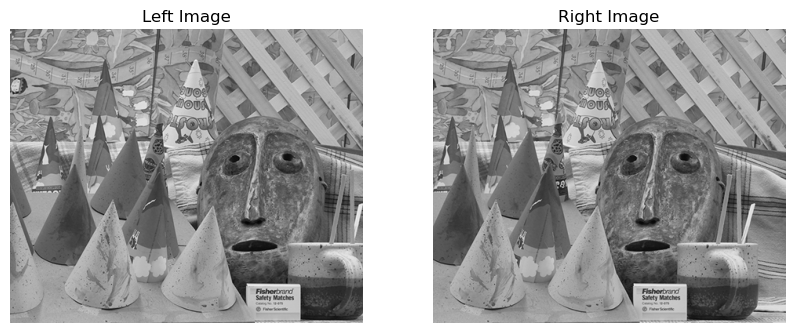

In [2]:
imgL = cv2.imread('../data/sample/cones_left.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('../data/sample/cones_right.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(imgL, cmap='gray')
ax[0].set_title('Left Image')
ax[0].axis('off')
ax[1].imshow(imgR, cmap='gray')
ax[1].set_title('Right Image')
ax[1].axis('off')

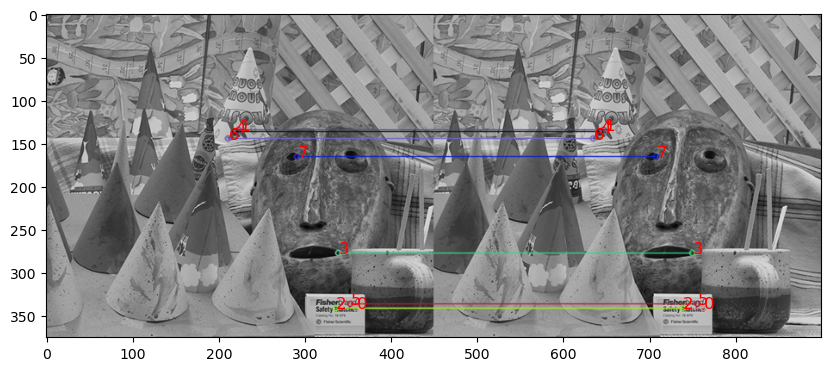

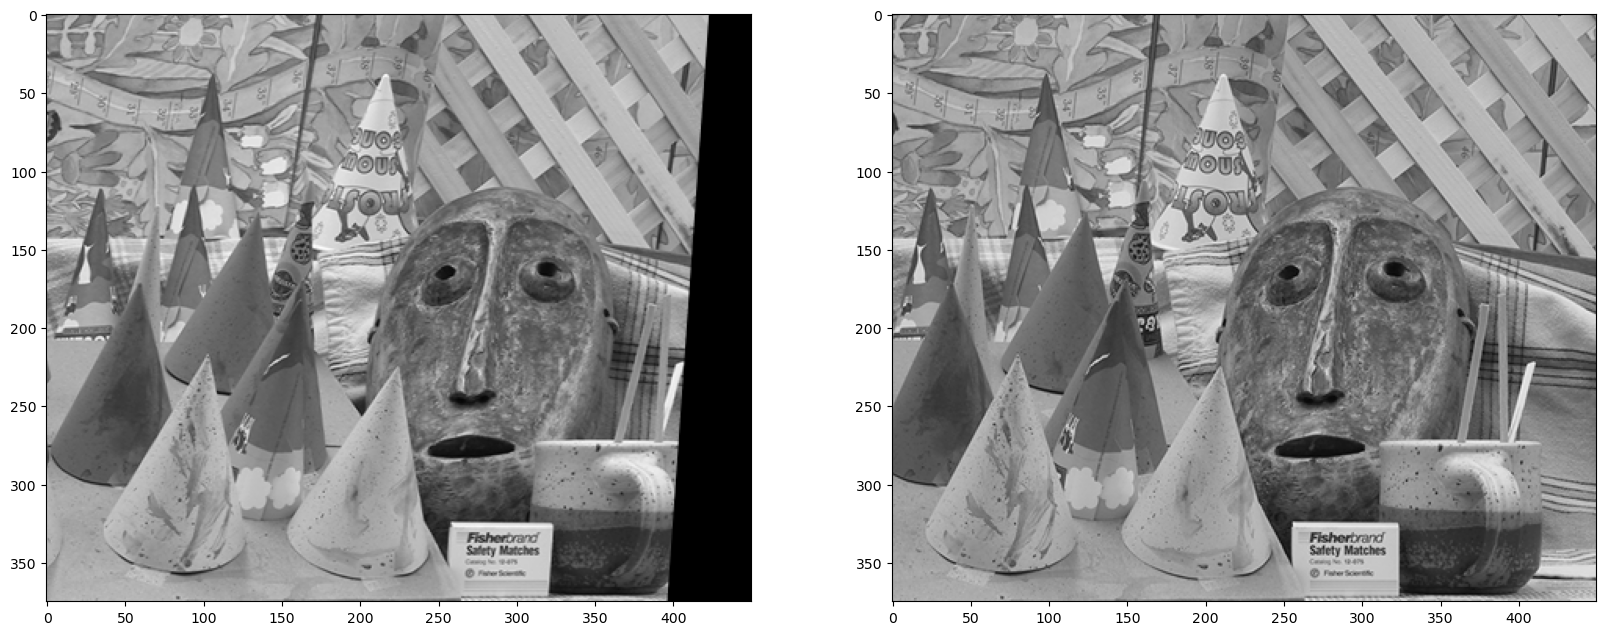

In [46]:
kp1, des1, kp2, des2, flann_match_pairs = get_keypoints_and_descriptors(imgL, imgR)
good_matches = lowes_ratio_test(flann_match_pairs, 0.4)
F, I, points1, points2 = compute_fundamental_matrix(good_matches, kp1, kp2, )

draw_matches(imgL, imgR, points1, points2)

h1, w1 = imgL.shape
h2, w2 = imgR.shape
_, H1, H2 = cv2.stereoRectifyUncalibrated(
    np.float32(points1), np.float32(points2), F, imgSize=(w1, h1), threshold=3,
)

imgL_undistorted = cv2.warpPerspective(imgL, H1, (w1, h1))
imgR_undistorted = cv2.warpPerspective(imgR, H2, (w2, h2))

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(imgL_undistorted, cmap='gray')
axs[1].imshow(imgR_undistorted, cmap='gray')

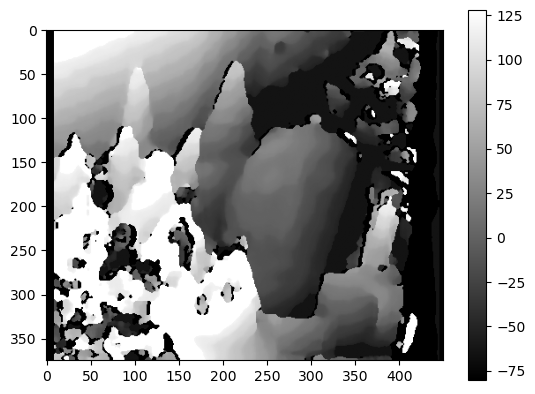

In [48]:
# Using StereoSGBM
# Set disparity parameters. Note: disparity range is tuned according to
#  specific parameters obtained through trial and error.
win_size = 2
min_disp = -4
max_disp = 9
num_disp = max_disp - min_disp  # Needs to be divisible by 16
stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=15,
    uniquenessRatio=5,
    speckleWindowSize=5,
    speckleRange=5,
    disp12MaxDiff=2,
    P1=8 * 3 * win_size ** 2,
    P2=32 * 3 * win_size ** 2,
)

disparity_SGBM = stereo.compute(imgL_undistorted, imgR_undistorted)
plt.imshow(disparity_SGBM, "gray")
plt.colorbar()
plt.show()

(np.float64(-0.5), np.float64(449.5), np.float64(374.5), np.float64(-0.5))

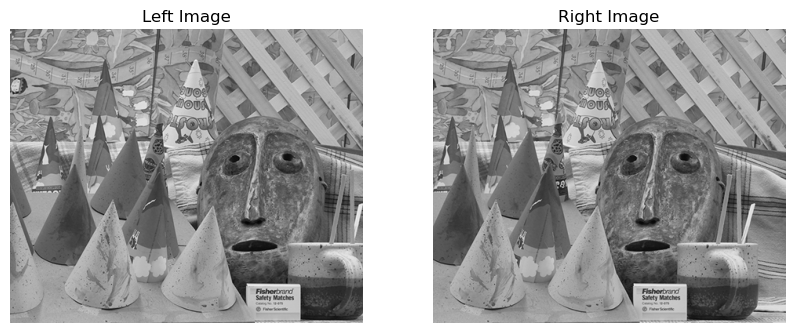

In [3]:
imgL = cv2.imread('../data/sample/cones_left.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('../data/sample/cones_right.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(imgL, cmap='gray')
ax[0].set_title('Left Image')
ax[0].axis('off')
ax[1].imshow(imgR, cmap='gray')
ax[1].set_title('Right Image')
ax[1].axis('off')